In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import sys

In [3]:
sys.path

['/Users/verakocetkova/Desktop/Data Science/ComputerVision/notebooks',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python310.zip',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10/lib-dynload',
 '',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10/site-packages']

In [4]:
sys.path.append('../')

In [5]:
from src.utils import find_homo
from src.pansharp import brovey_transform, intensity_transform

In [6]:
gray_img = cv2.imread("../image_processing_task1/GRAY.JPG", cv2.IMREAD_UNCHANGED)

In [7]:
gray_img.shape

(741, 1363)

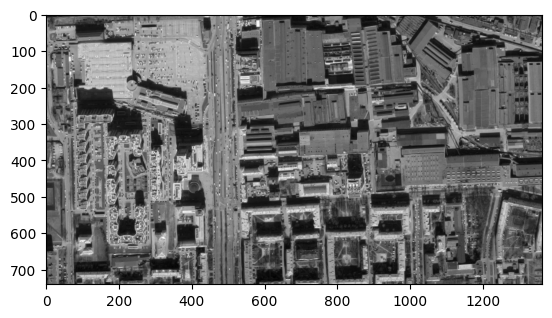

In [8]:
plt.imshow(gray_img, "gray");

In [9]:
rgb_half = cv2.imread("../image_processing_task1/RGB_half.JPG")

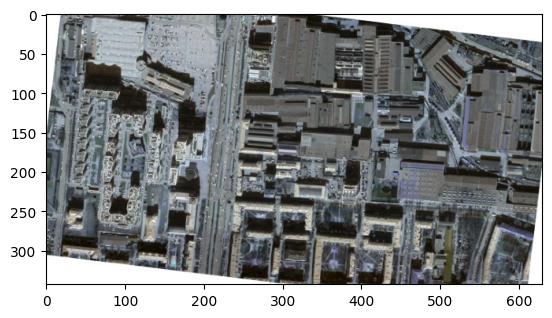

In [11]:
plt.imshow(rgb_half);

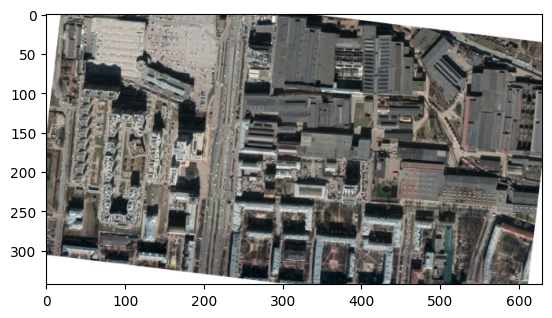

In [11]:
plt.imshow(cv2.cvtColor(rgb_half, cv2.COLOR_BGR2RGB));

In [12]:
rgb_quater = cv2.imread("../image_processing_task1/RGB_quater.JPG")

In [13]:
rgb_quater.shape

(207, 380, 3)

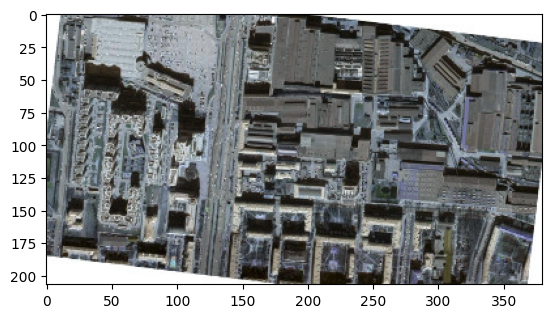

In [16]:
plt.imshow(rgb_quater);

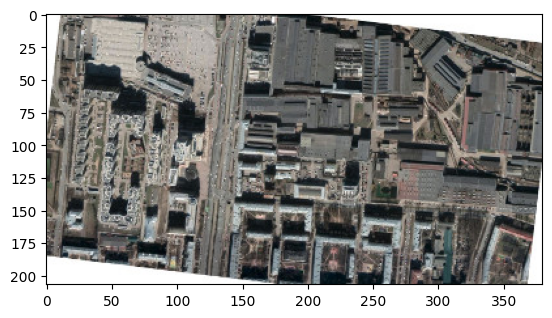

In [18]:
plt.imshow(cv2.cvtColor(rgb_quater, cv2.COLOR_BGR2RGB))

# Pan sharpening

## try SIFT

In [19]:
img = cv2.imread("../image_processing_task1/RGB_half.JPG")
# gray= cv2.cvtColor(rgb_half,cv2.COLOR_BGR2GRAY)

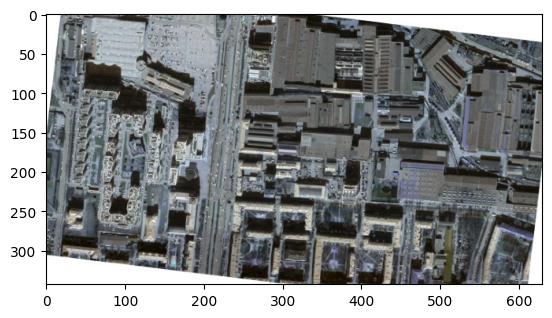

In [20]:
plt.imshow(rgb_half);

In [22]:
sift = cv2.SIFT_create()
kp = sift.detect(gray_img,None)

In [23]:
img = cv2.drawKeypoints(gray_img,kp,img)

In [25]:
img=cv2.drawKeypoints(gray_img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


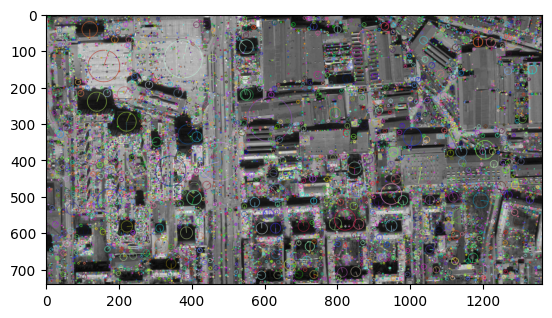

In [26]:
plt.imshow(img,'gray');

In [27]:
gray= cv2.cvtColor(rgb_quater,cv2.COLOR_BGR2GRAY)

In [28]:
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)

In [29]:
img=cv2.drawKeypoints(gray,kp,rgb_quater)

In [30]:
img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


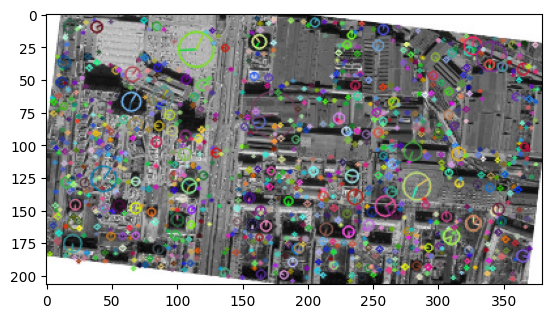

In [31]:
plt.imshow(img,'gray');

## Feature Matching + Homography to find Objects

In [32]:
rgb_half = cv2.imread("../image_processing_task1/RGB_half.JPG")

In [33]:
rgb_half = cv2.cvtColor(rgb_half, cv2.COLOR_BGR2RGB)

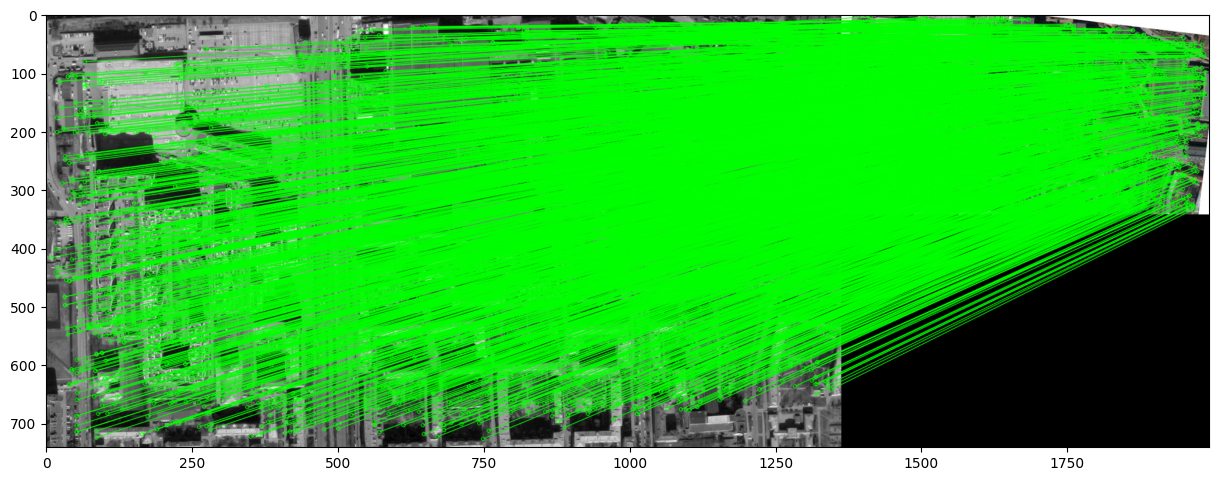

In [34]:
matrix = find_homo(gray_img, rgb_half)

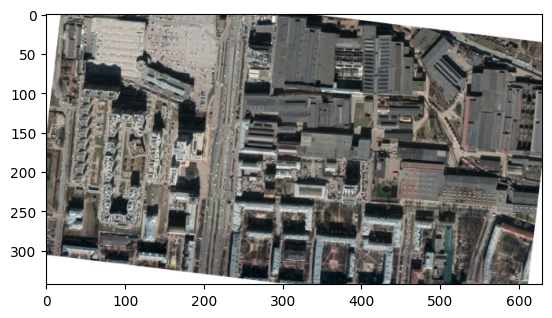

In [35]:
plt.imshow(rgb_half, 'gray')

### Transforming

In [36]:
h, w = gray_img.shape

In [37]:
rgb_half.shape[:2]

(343, 630)

In [38]:
rgb_half_tranf = cv2.warpPerspective(rgb_half, matrix, (w,h), flags=cv2.WARP_INVERSE_MAP)

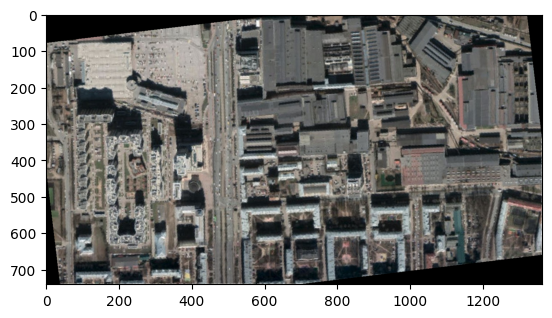

In [39]:
plt.imshow(rgb_half_tranf);

Transformation - success!

## transforming second image

In [40]:
rgb_quater = cv2.imread("../image_processing_task1/RGB_quater.JPG")

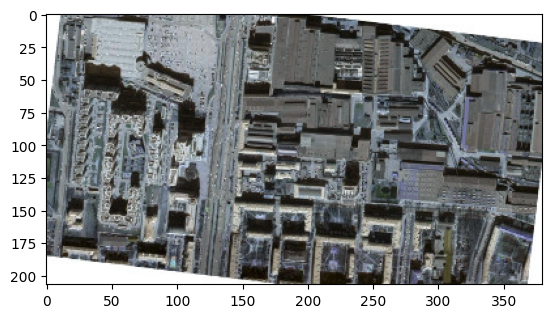

In [41]:
plt.imshow(rgb_quater)

In [42]:
rgb_quater = cv2.cvtColor(rgb_quater, cv2.COLOR_BGR2RGB)

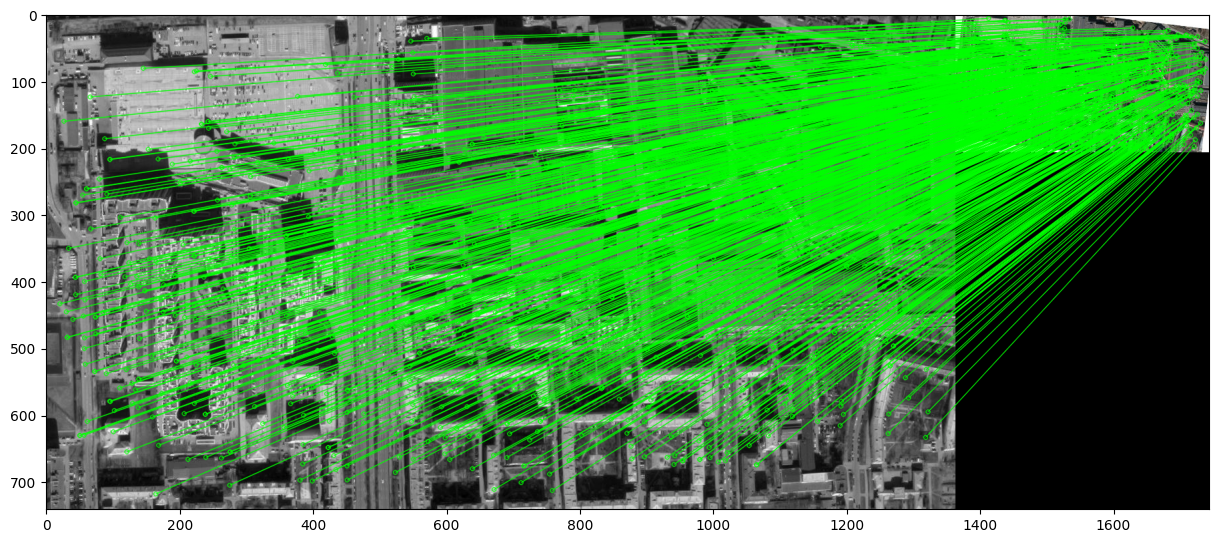

In [43]:
matrix_2 = find_homo(gray_img, rgb_quater)

In [44]:
rgb_quater_tranf = cv2.warpPerspective(rgb_quater, matrix_2, (w,h), flags=cv2.WARP_INVERSE_MAP)

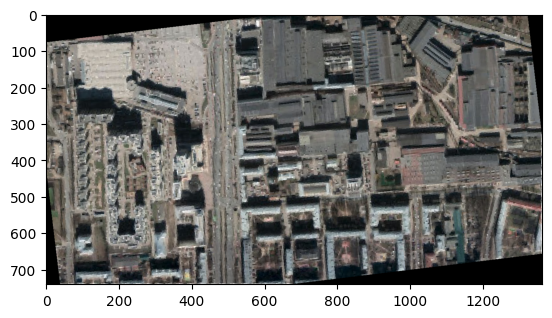

In [45]:
plt.imshow(rgb_quater_tranf);

I have tranformed all colored images using Homography.
Now I need to restore color information 

# Restore color information 

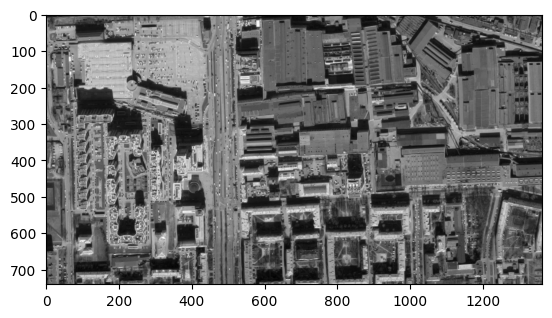

In [46]:
plt.imshow(gray_img, "gray");

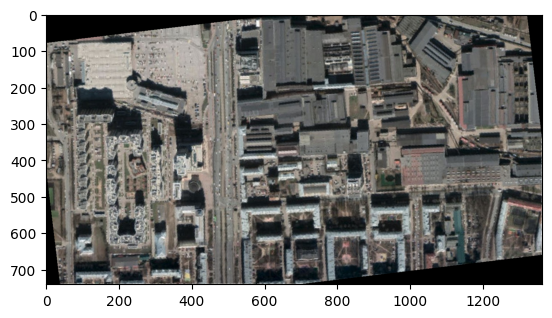

In [47]:
plt.imshow(rgb_half_tranf);

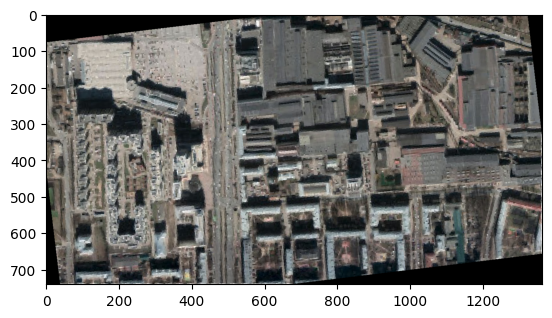

In [48]:
plt.imshow(rgb_quater_tranf);

## HSV using intensity

In [51]:
gray_half = intensity_transform(rgb_half_tranf, gray_img)

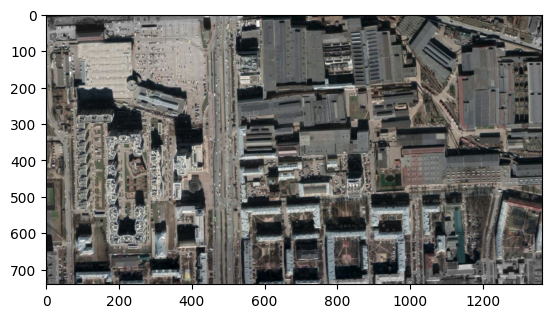

In [52]:
plt.imshow(cv2.cvtColor(gray_half, cv2.COLOR_BGR2RGB))

For comparison - it worked

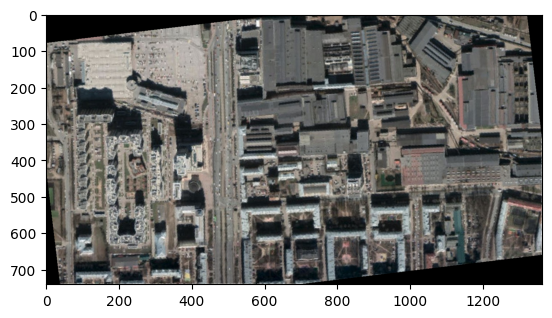

In [54]:
plt.imshow(rgb_half_tranf)

Let's use second image

In [55]:
gray_quater = intensity_transform(rgb_quater_tranf, gray_img)

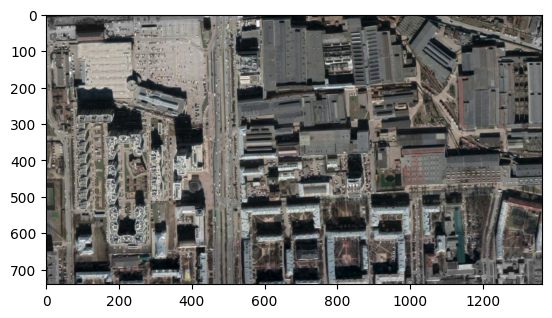

In [56]:
plt.imshow(cv2.cvtColor(gray_quater, cv2.COLOR_BGR2RGB))

## brovey

$$ Red_{out} = \frac{Pan}{1/3(blue_{in} + green_{in} + red_{in})} *  R_{in} $$

In [49]:
gray_half = brovey_transform(rgb_half_tranf, gray_img)

/Users/verakocetkova/Desktop/Data Science/ComputerVision/notebooks/../src/pansharp.py:9: RuntimeWarning: divide by zero encountered in divide
  const = gray_img * 3 / (b + g + r)
/Users/verakocetkova/Desktop/Data Science/ComputerVision/notebooks/../src/pansharp.py:10: RuntimeWarning: invalid value encountered in multiply
  r_out = r * const
/Users/verakocetkova/Desktop/Data Science/ComputerVision/notebooks/../src/pansharp.py:11: RuntimeWarning: invalid value encountered in multiply
  b_out = b * const
/Users/verakocetkova/Desktop/Data Science/ComputerVision/notebooks/../src/pansharp.py:12: RuntimeWarning: invalid value encountered in multiply
  g_out = g * const


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


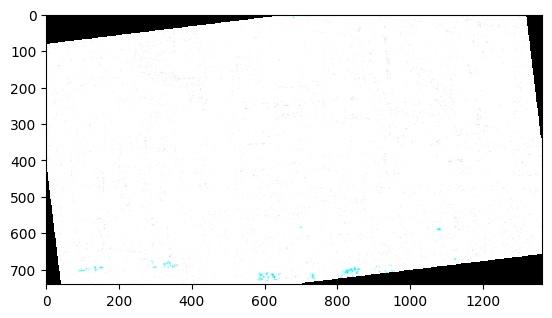

In [50]:
plt.imshow(gray_half)